In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
ordinary = pd.read_csv("data/ordinary_games_adj.csv")
top = pd.read_csv("data/top_aggregated_games_adj.csv")

# Add column to distinguish groups
ordinary["category"] = "Ordinary (<1M)"
top["category"] = "Top (>=1M)"

# Combine datasets
combined = pd.concat([ordinary, top], ignore_index=True)

# Set seaborn style
sns.set(style="whitegrid")


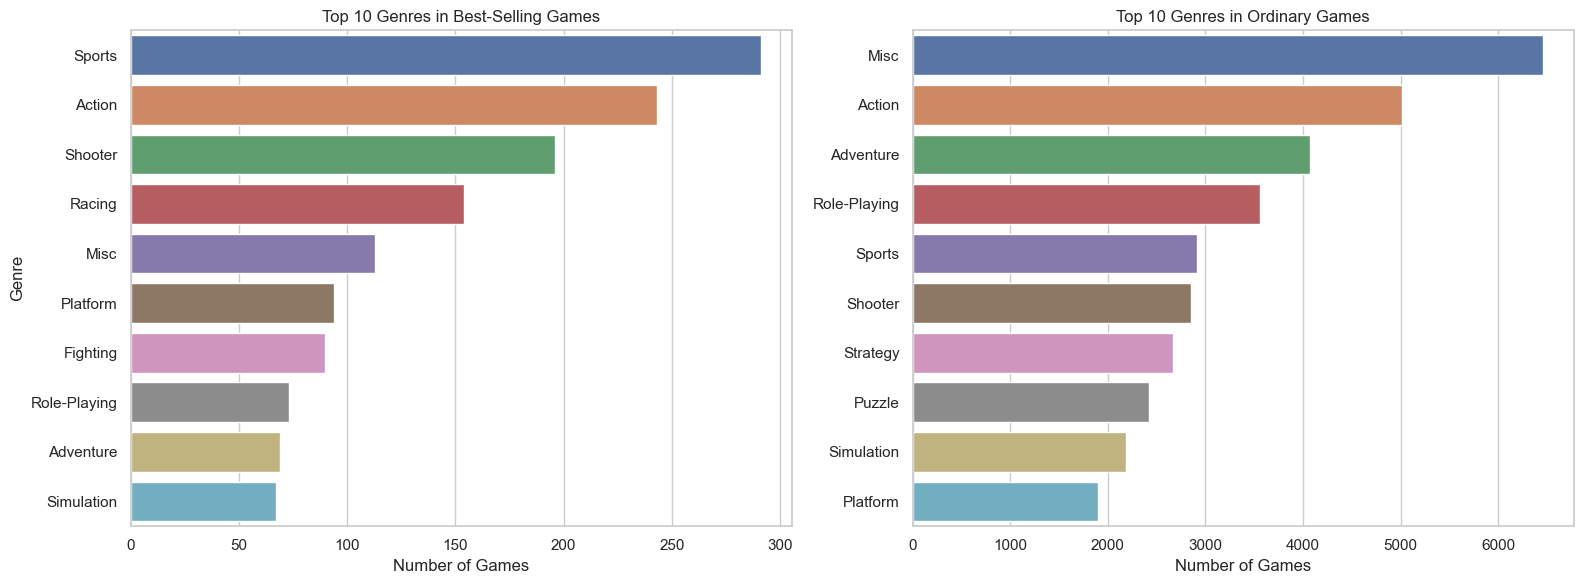

In [13]:
# Preparing data for side-by-side genre comparison
top_genres = top['genre'].value_counts().nlargest(10)
ordinary_genres = ordinary['genre'].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top games genre barplot
sns.barplot(
    ax=axes[0],
    x=top_genres.values,
    y=top_genres.index,
    hue=top_genres.index,  # hue required to avoid warning
    legend=False
)
axes[0].set_title("Top 10 Genres in Best-Selling Games")
axes[0].set_xlabel("Number of Games")
axes[0].set_ylabel("Genre")

# 📉 Ordinary games genre barplot
sns.barplot(
    ax=axes[1],
    x=ordinary_genres.values,
    y=ordinary_genres.index,
    hue=ordinary_genres.index,
    legend=False
)
axes[1].set_title("Top 10 Genres in Ordinary Games")
axes[1].set_xlabel("Number of Games")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


## 🎯 Genre Comparison: Best-Selling vs. Ordinary Games

This side-by-side visualization highlights the top 10 most common genres for both best-selling games (≥1M copies) and ordinary games (<1M copies).

**Key observations:**
- **Best-sellers** are dominated by action-heavy and competitive genres like **Sports**, **Action**, **Shooter**, and **Racing**.
- In contrast, **ordinary games** show a broader spread across genres, with **Misc**, **Adventure**, **Role-Playing**, and **Strategy** being more frequent.
- Some genres (e.g., **Shooter**, **Racing**) have proportionally much stronger representation among top-sellers, indicating higher commercial potential.

This insight helps identify which genres are not just popular in terms of volume but also likely to generate higher sales.

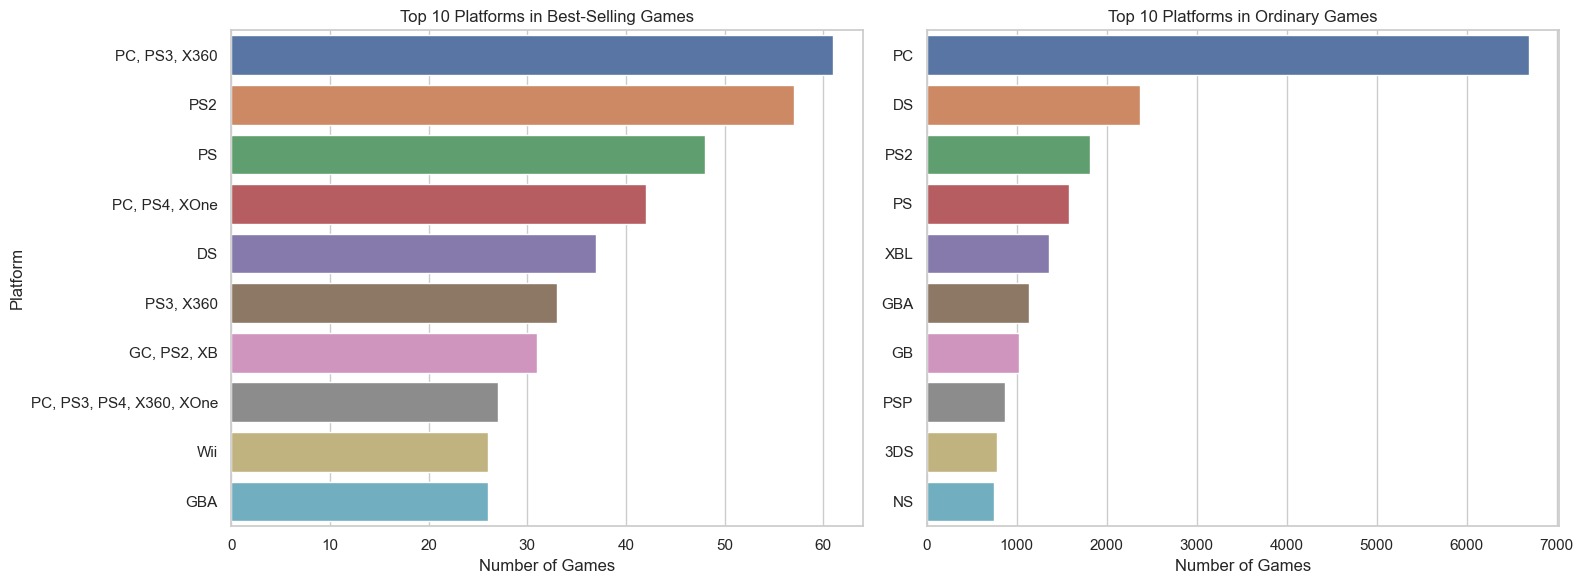

In [14]:
# 🎮 Top 10 Platforms in Top-Selling and Ordinary Games
top_platforms = top['console'].value_counts().nlargest(10)
ordinary_platforms = ordinary['console'].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Top-selling games platforms
sns.barplot(
    ax=axes[0],
    x=top_platforms.values,
    y=top_platforms.index,
    hue=top_platforms.index,
    legend=False
)
axes[0].set_title("Top 10 Platforms in Best-Selling Games")
axes[0].set_xlabel("Number of Games")
axes[0].set_ylabel("Platform")

# Right: Ordinary games platforms
sns.barplot(
    ax=axes[1],
    x=ordinary_platforms.values,
    y=ordinary_platforms.index,
    hue=ordinary_platforms.index,
    legend=False
)
axes[1].set_title("Top 10 Platforms in Ordinary Games")
axes[1].set_xlabel("Number of Games")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

## 🕹️ Platform Comparison: Best-Selling vs. Ordinary Games

This visualization shows the top 10 most common platforms for best-selling and ordinary games.

**Insights:**

- Among **best-selling games**, we see a strong presence of **multi-platform titles**, especially combinations involving **PC**, **PlayStation**, and **Xbox** platforms (e.g., "PC, PS3, X360"). This suggests that cross-platform availability increases commercial success.
- **Legacy consoles** like **PS2**, **DS**, and **Wii** remain dominant among top games, indicating the long-term impact of large player bases.
- On the **ordinary side**, **PC** overwhelmingly dominates, suggesting a vast amount of smaller-scale or niche titles released on this platform.
- **Handheld consoles** such as **GBA**, **PSP**, and **3DS** appear more frequently in ordinary games, possibly due to lower development thresholds and market fragmentation.

This comparison underlines the strategic importance of platform targeting. While PC is accessible, reaching top-tier sales often requires leveraging major consoles or multiple platforms.

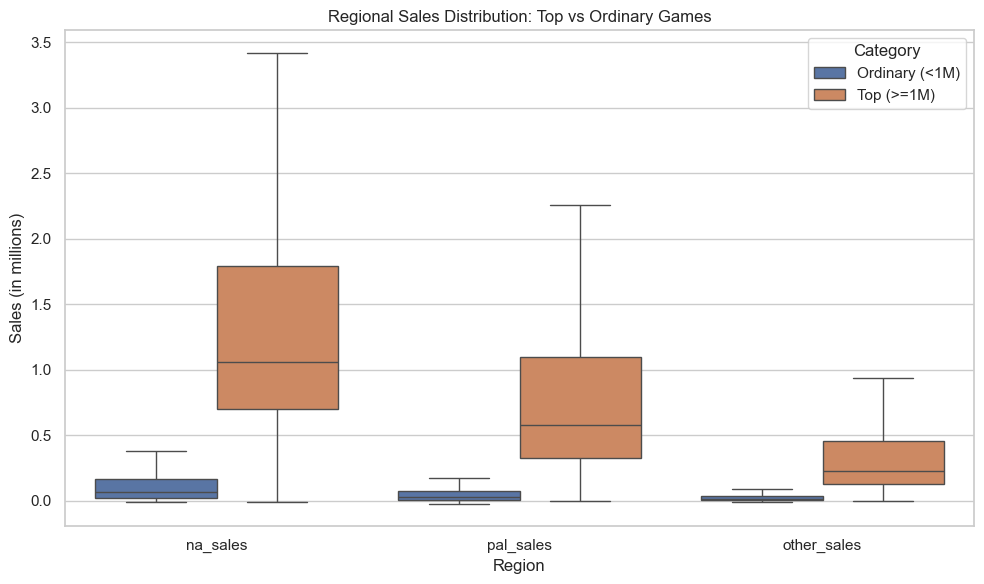

In [15]:
# Preparing data for melting
sales_cols = ['na_sales', 'pal_sales', 'other_sales']
ordinary_melted = ordinary.melt(value_vars=sales_cols, var_name='Region', value_name='Sales')
ordinary_melted['Category'] = 'Ordinary (<1M)'

top_melted = top.melt(value_vars=sales_cols, var_name='Region', value_name='Sales')
top_melted['Category'] = 'Top (>=1M)'

sales_combined = pd.concat([ordinary_melted, top_melted])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_combined, x='Region', y='Sales', hue='Category', showfliers=False)
plt.title('Regional Sales Distribution: Top vs Ordinary Games')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.tight_layout()
plt.show()

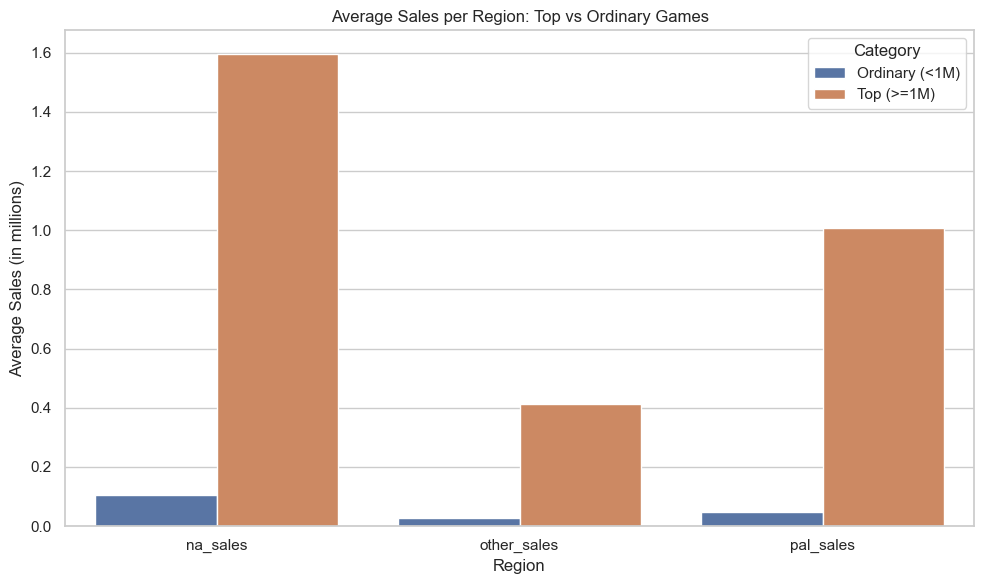

In [16]:
# Group by region and category
mean_sales = sales_combined.groupby(['Region', 'Category'])['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_sales, x='Region', y='Sales', hue='Category')
plt.title('Average Sales per Region: Top vs Ordinary Games')
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


## 🌍 Regional Sales Insights

These visualizations show how game sales differ between regions and performance categories.

### Key takeaways:

- **Top-selling games** generate most of their revenue from **North America**, with **Europe (PAL)** also contributing significantly.
- **Ordinary games** rarely reach high numbers in any region — average sales stay under 0.1M.
- The **boxplot** reveals a wide spread in top games’ performance, especially in NA, where some games sell over 3 million copies.
- In contrast, ordinary games show a **tightly clustered distribution**, indicating they generally fail to break through in any region.

This suggests that **North America is the most crucial region** for blockbuster game success.

## ✅ Final Takeaways

Through our visual analysis, we observed:

- **Top-selling games** are dominated by specific genres (Sports, Action, Shooter), tend to launch on **multiple major platforms**, and achieve strong performance especially in **North America**.
- **Ordinary games** are more evenly spread across genres and platforms, with lower and more consistent sales across all regions.
- Platform and region targeting appears to be a strong determinant of commercial success.

These findings can help guide decisions in marketing, development focus, and platform release strategies.